Accuracy on training 1.000
Accuracy on testing 0.574
Number of Leaves 64
Tree Depth 11


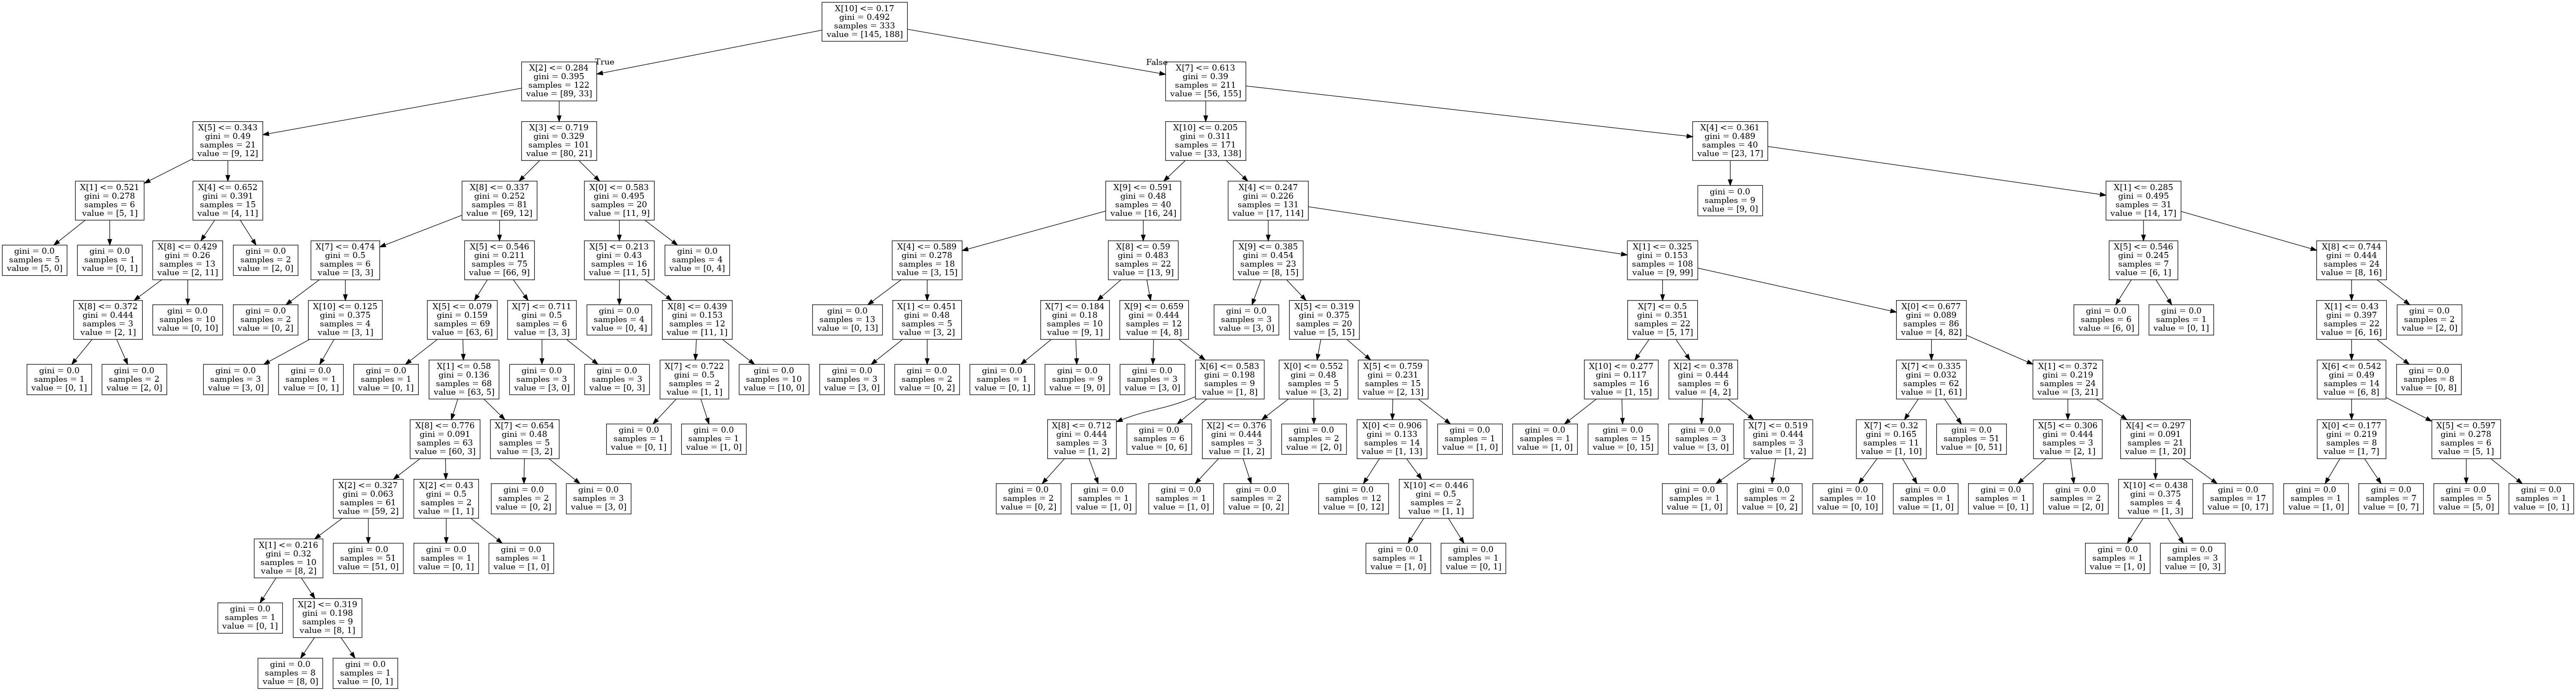

Prune Level: 2
Accuracy on training 0.946
Accuracy on testing 0.638
Number of Leaves 82
Tree Depth 11


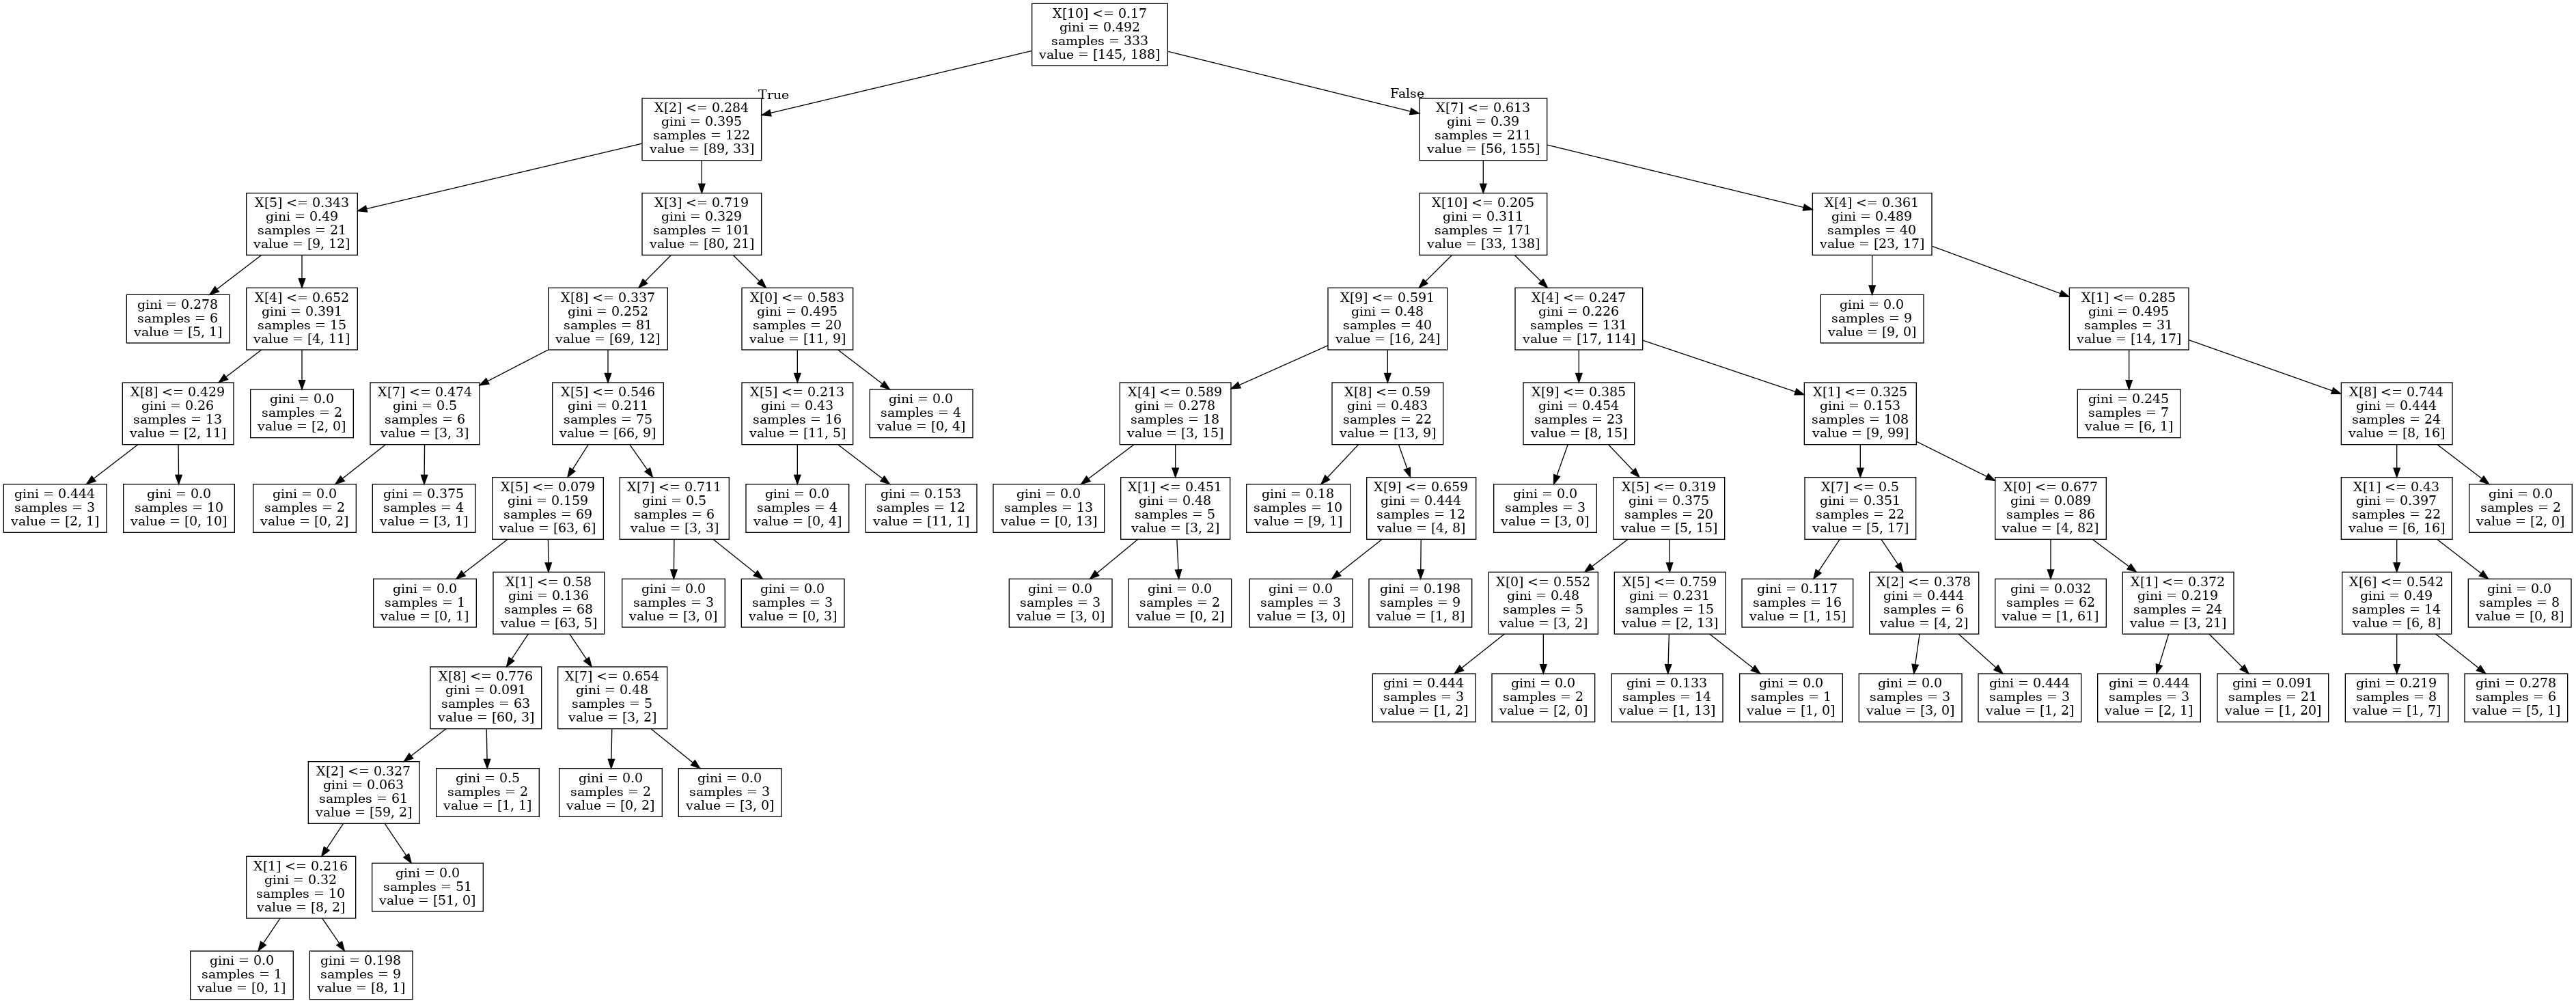

Prune Level: 18
Accuracy on training 0.760
Accuracy on testing 0.681
Number of Leaves 115
Tree Depth 11


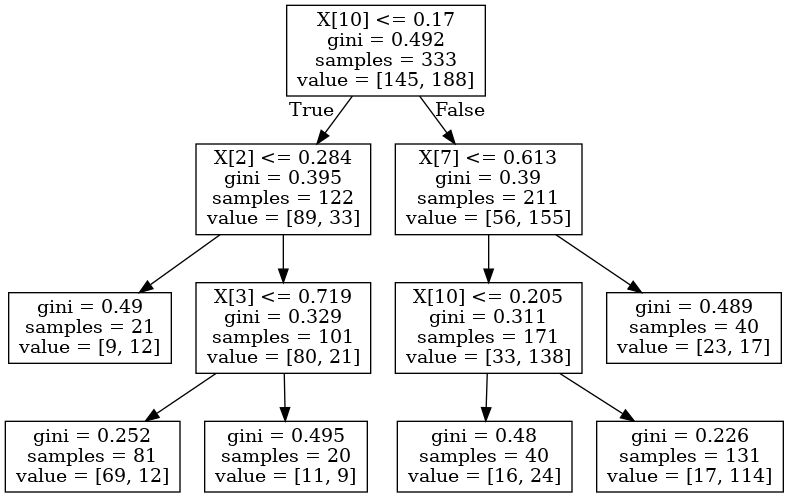

Prune Level: 34
Accuracy on training 0.751
Accuracy on testing 0.713
Number of Leaves 118
Tree Depth 11


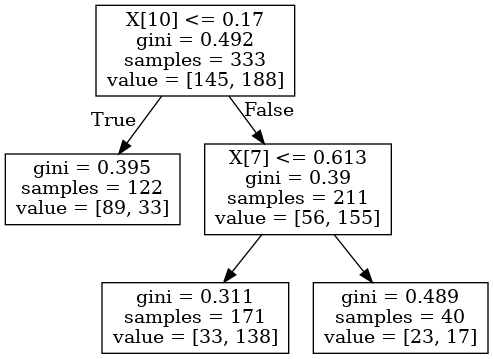

Prune Level: 80
Accuracy on training 0.733
Accuracy on testing 0.670
Number of Leaves 119
Tree Depth 11


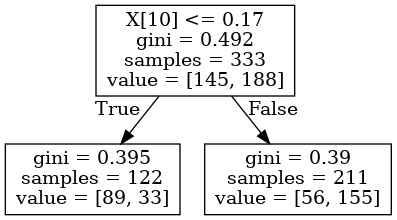

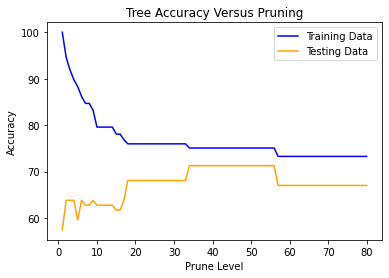

KNearest Neighbor
7 Neighbors
Accuracy on training 0.790
Accuracy on testing 0.681
KNearest Neighbor
10 Neighbors
Accuracy on training 0.757
Accuracy on testing 0.702
KNearest Neighbor
12 Neighbors
Accuracy on training 0.766
Accuracy on testing 0.723


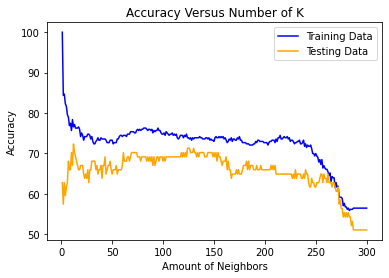

Accuracy on training 1.000
Accuracy on testing 0.649
Number of Leaves 51
Tree Depth 11


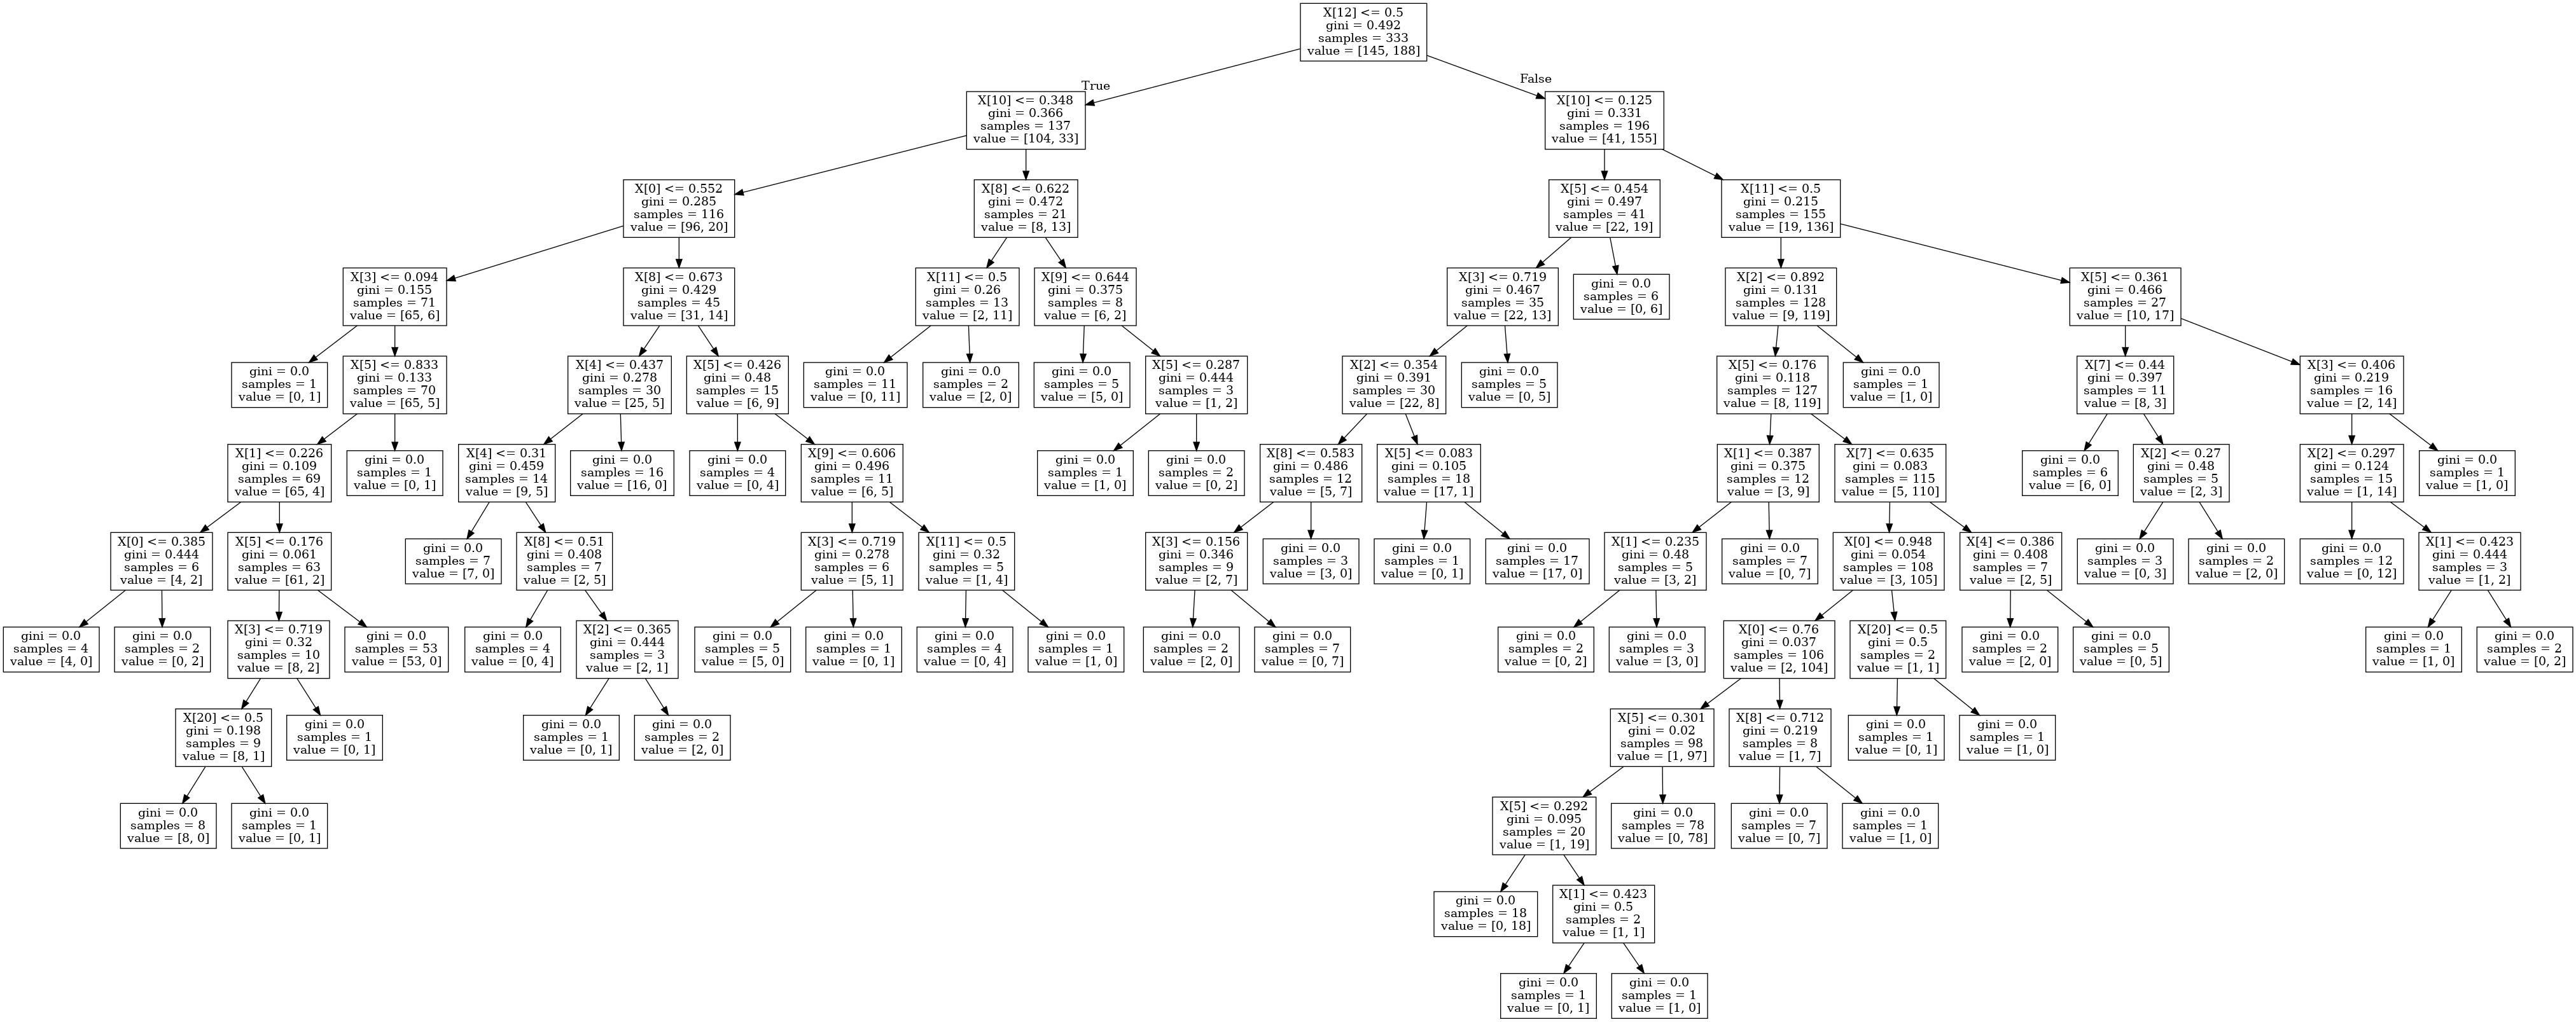

Prune Level: 2
Accuracy on training 0.970
Accuracy on testing 0.691
Number of Leaves 61
Tree Depth 11


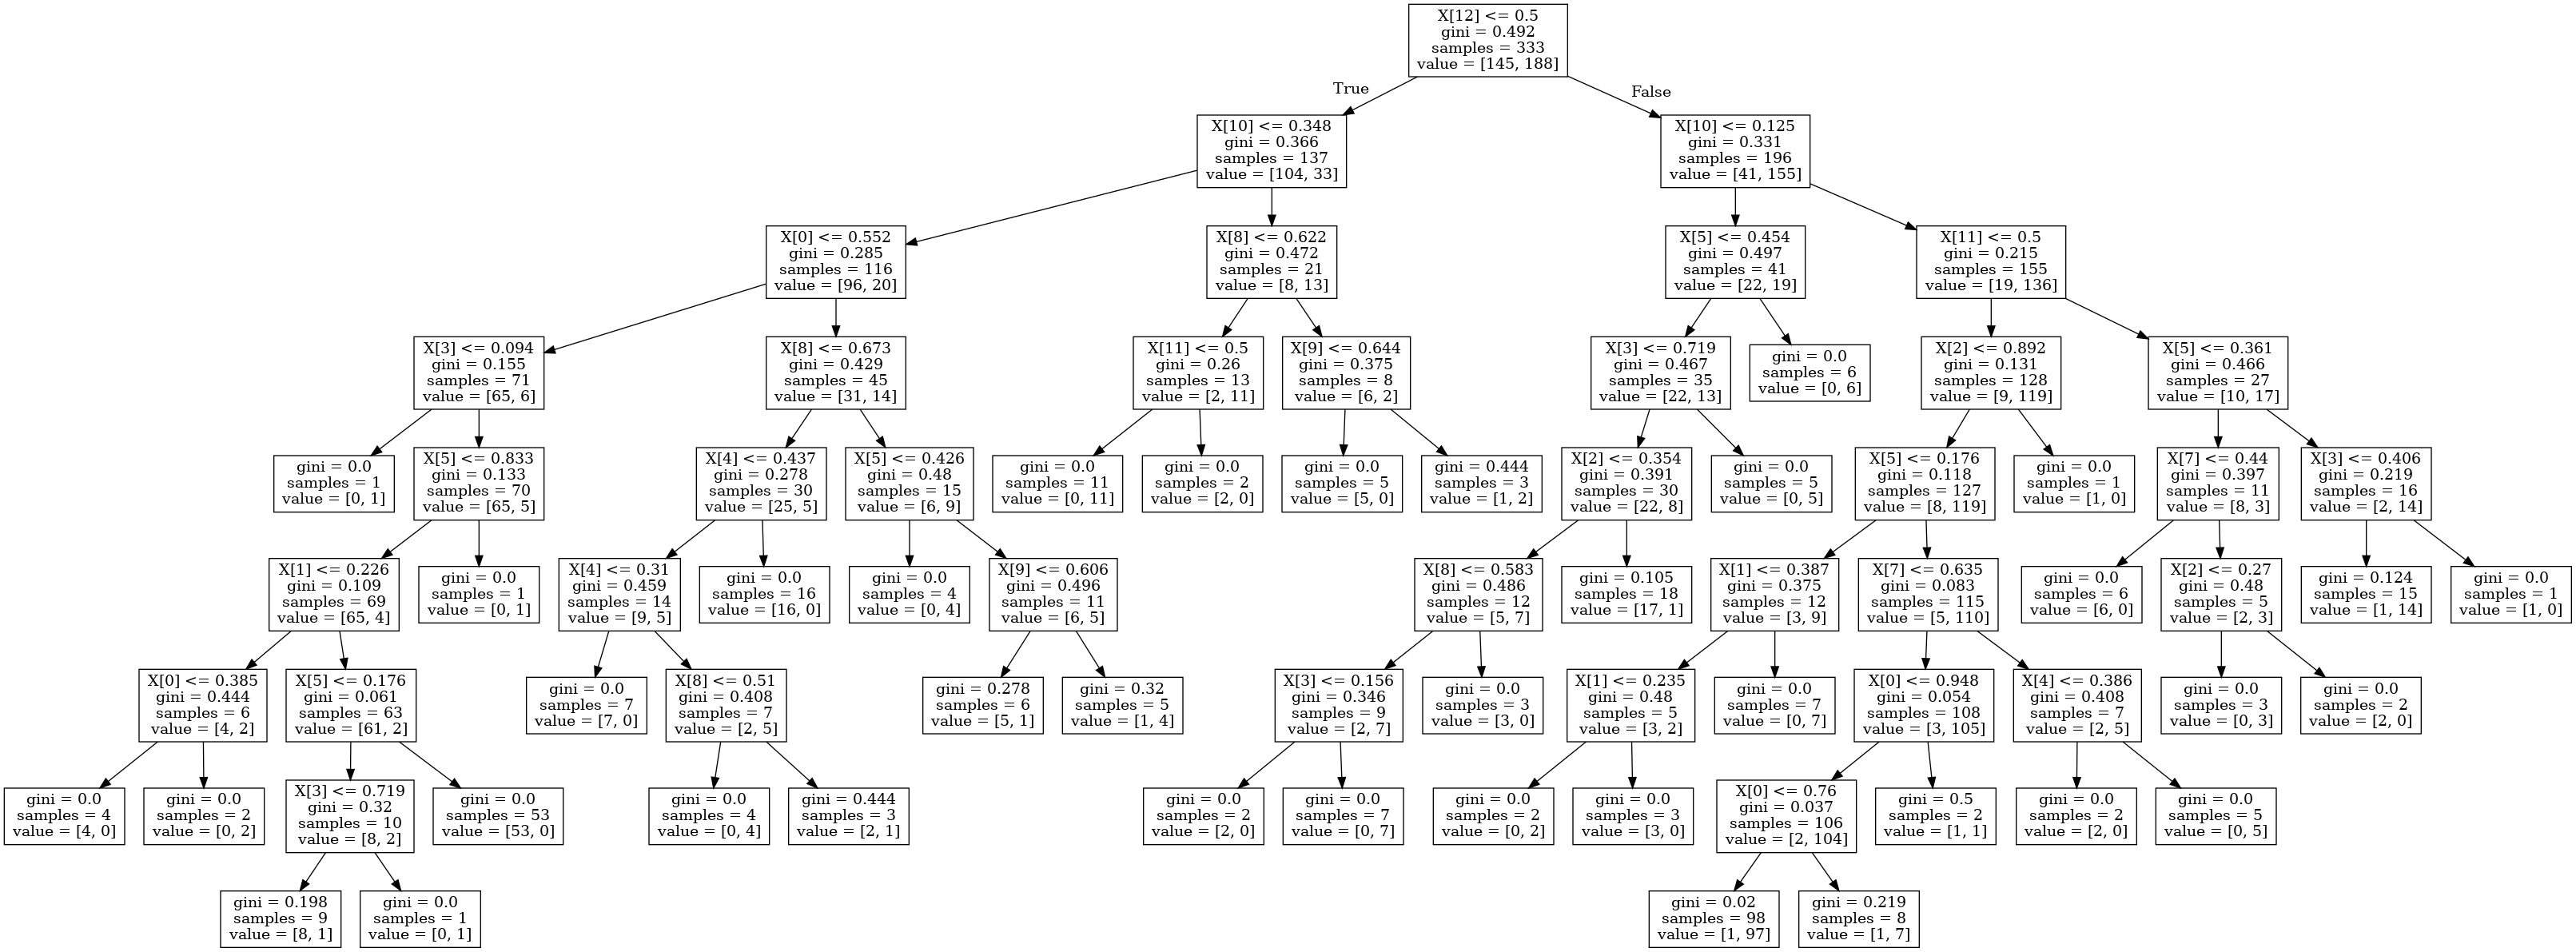

Prune Level: 6
Accuracy on training 0.886
Accuracy on testing 0.723
Number of Leaves 81
Tree Depth 11


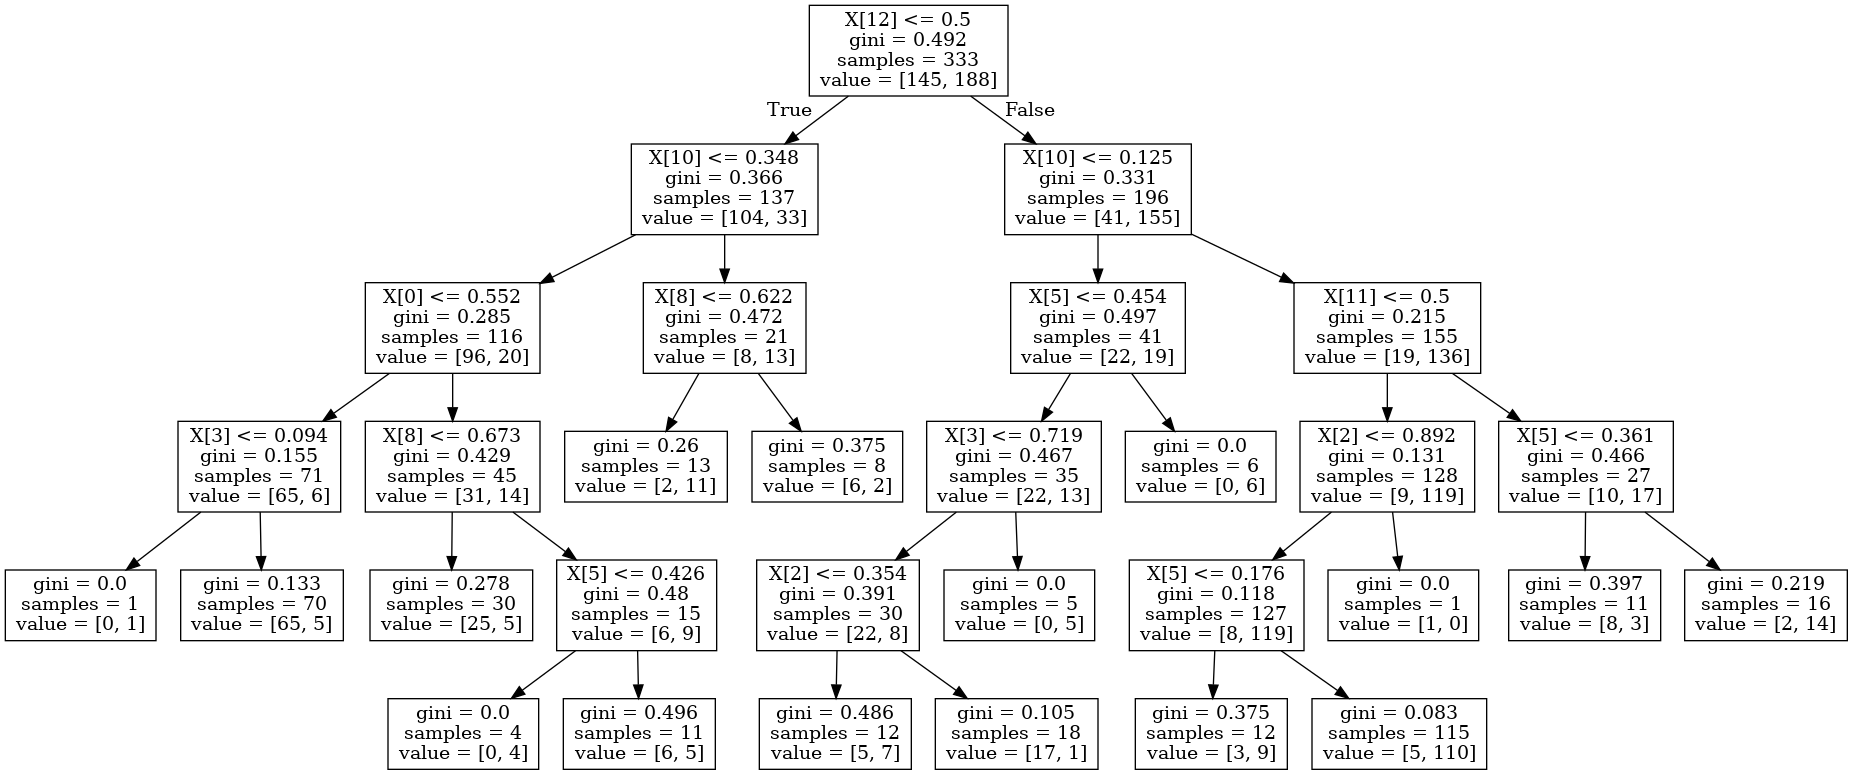

Prune Level: 15
Accuracy on training 0.820
Accuracy on testing 0.734
Number of Leaves 90
Tree Depth 11


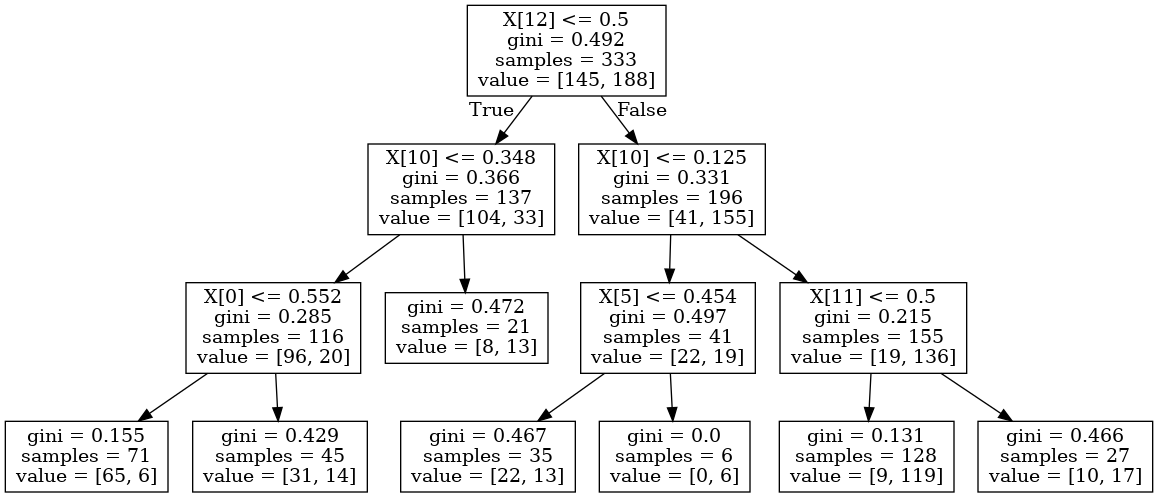

Prune Level: 20
Accuracy on training 0.802
Accuracy on testing 0.745
Number of Leaves 92
Tree Depth 11


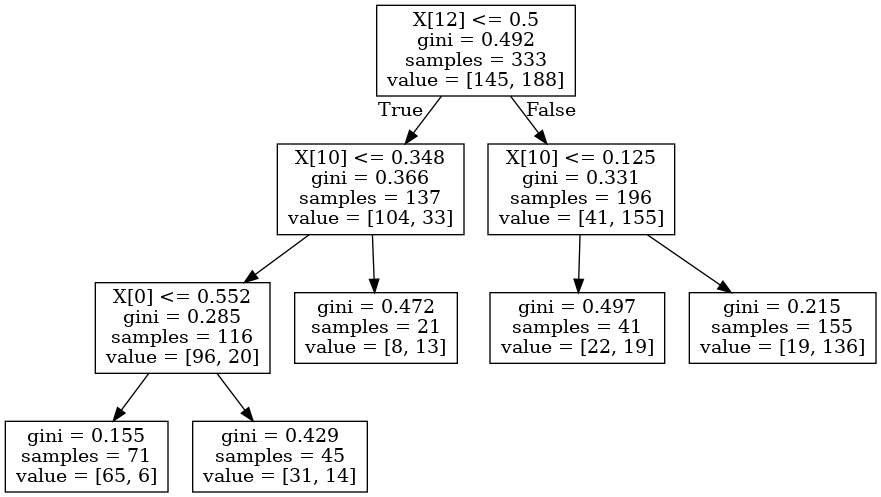

Prune Level: 80
Accuracy on training 0.778
Accuracy on testing 0.723
Number of Leaves 95
Tree Depth 11


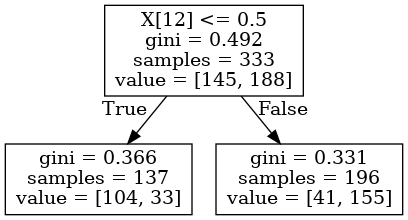

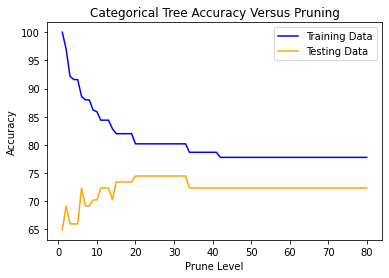

In [3]:
from sklearn.tree import DecisionTreeClassifier;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.cluster import KMeans;
from sklearn.model_selection import train_test_split;
from sklearn.tree._tree import TREE_LEAF;
from sklearn import tree as treeDep;
from IPython.display import Image;
import pydotplus;
from copy import deepcopy;
from sklearn.neighbors import KNeighborsClassifier;


# Convert String Columns to Categorical
def categorizeStrings(Table):
    for column in Table.columns:
        if type(Table[column][0]) == str:
            Table[column] = Table[column].astype("category")
            Table[column] = pd.get_dummies(Table[column])
            
    return Table

# Prune Tree
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)


# Problem 1

heartNum = pd.read_csv("heartDataNum.csv")
# print(heartNum.head(2))
x_train, x_test, y_train, y_test = train_test_split(heartNum.drop("HeartDisease", axis=1),heartNum['HeartDisease'], random_state=42, test_size=.22 )
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training {:.3f}".format(tree.score(x_train,y_train)))
print("Accuracy on testing {:.3f}".format(tree.score(x_test,y_test)))
print("Number of Leaves {}".format(tree.get_n_leaves()))
print("Tree Depth {}".format(tree.get_depth()))

dot_data = treeDep.export_graphviz(tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('./tree.png')
display(Image(graph.create_png()))

# Prune
levels = 80
training_accuracy = []
testing_accuracy = []
for i in range(levels):
    
    prune_index(tree.tree_, 0, i+1)
    training_accuracy.append(tree.score(x_train,y_train))
    testing_accuracy.append(tree.score(x_test,y_test))
    if i ==0:
        continue
    if tree.score(x_test,y_test) > max(testing_accuracy[:i]) or i == levels-1:
        print("Prune Level: {}".format(i+1))
        print("Accuracy on training {:.3f}".format(tree.score(x_train,y_train)))
        print("Accuracy on testing {:.3f}".format(tree.score(x_test,y_test)))
        print("Number of Leaves {}".format(tree.get_n_leaves()))
        print("Tree Depth {}".format(tree.get_depth()))

        dot_data = treeDep.export_graphviz(tree, out_file=None)
        graph = pydotplus.graph_from_dot_data(dot_data)
        # graph.write_png('./treepruned.png')
        display(Image(graph.create_png()))

plt.plot(np.add(range(levels),1), np.multiply(training_accuracy,100), c='blue', label='Training Data')
plt.plot(np.add(range(levels),1), np.multiply(testing_accuracy,100), c='orange', label="Testing Data")
plt.xlabel("Prune Level")
plt.ylabel("Accuracy")
plt.title("Tree Accuracy Versus Pruning")
plt.legend()
plt.show()



# Problem 2
# K-nearest Neighbor

iterations = 300
training_accuracy = []
testing_accuracy = []

for i in range(iterations):
    
    kN = KNeighborsClassifier(n_neighbors=i+1)
    kN.fit(x_train, y_train)
    training_accuracy.append(kN.score(x_train,y_train))
    testing_accuracy.append(kN.score(x_test,y_test))
    
    
    if i ==0:
        continue
    if kN.score(x_test,y_test) > max(testing_accuracy[:i]):
        print("KNearest Neighbor\n{} Neighbors".format(i+1))
        print("Accuracy on training {:.3f}".format(kN.score(x_train,y_train)))
        print("Accuracy on testing {:.3f}".format(kN.score(x_test,y_test)))
    
plt.plot(np.add(range(iterations),1), np.multiply(training_accuracy,100), c='blue', label='Training Data')
plt.plot(np.add(range(iterations),1), np.multiply(testing_accuracy,100), c='orange', label="Testing Data")
plt.xlabel("Amount of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy Versus Number of K")
plt.legend()
plt.show()



# Problem 3

# Read Data
heartAll = pd.read_csv("heartDataAll.csv")

# Convert String Columns to Categorical
heartAll = categorizeStrings(heartAll)

# print(heartAll.head(2))
x_train, x_test, y_train, y_test = train_test_split(heartAll.drop("HeartDisease", axis=1),heartAll['HeartDisease'], random_state=42, test_size=.22 )
mdl = DecisionTreeClassifier(random_state=0)
mdl.fit(x_train, y_train)

print("Accuracy on training {:.3f}".format(mdl.score(x_train,y_train)))
print("Accuracy on testing {:.3f}".format(mdl.score(x_test,y_test)))
print("Number of Leaves {}".format(mdl.get_n_leaves()))
print("Tree Depth {}".format(mdl.get_depth()))

dot_data = treeDep.export_graphviz(mdl, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('./mdl.png')
display(Image(graph.create_png()))

# Prune
levels = 80
training_accuracy = []
testing_accuracy = []
for i in range(levels):
    
    prune_index(mdl.tree_, 0, i+1)
    training_accuracy.append(mdl.score(x_train,y_train))
    testing_accuracy.append(mdl.score(x_test,y_test))
    if i ==0:
        continue
    if mdl.score(x_test,y_test) > max(testing_accuracy[:i]) or i == levels-1:
        print("Prune Level: {}".format(i+1))
        print("Accuracy on training {:.3f}".format(mdl.score(x_train,y_train)))
        print("Accuracy on testing {:.3f}".format(mdl.score(x_test,y_test)))
        print("Number of Leaves {}".format(mdl.get_n_leaves()))
        print("Tree Depth {}".format(mdl.get_depth()))

        dot_data = treeDep.export_graphviz(mdl, out_file=None)
        graph = pydotplus.graph_from_dot_data(dot_data)
        # graph.write_png('./mdlpruned.png')
        display(Image(graph.create_png()))

plt.plot(np.add(range(levels),1), np.multiply(training_accuracy,100), c='blue', label='Training Data')
plt.plot(np.add(range(levels),1), np.multiply(testing_accuracy,100), c='orange', label="Testing Data")
plt.xlabel("Prune Level")
plt.ylabel("Accuracy")
plt.title("Categorical Tree Accuracy Versus Pruning")
plt.legend()
plt.show()
